In [5]:
import pandas as pd

In [14]:
GDP = pd.read_csv('GDP.csv')

In [15]:
# 將 'date' 列轉換為時間序列格式，假設格式為 'YYYYMM'
GDP['date'] = pd.to_datetime(GDP['date'], format='%Y%m')

# 查看結果
print(GDP)

         date  GDP_index
0  2013-01-01    3670889
1  2013-02-01    3721253
2  2013-03-01    3877352
3  2013-04-01    4001234
4  2014-01-01    3864177
5  2014-02-01    3966585
6  2014-03-01    4137478
7  2014-04-01    4289807
8  2015-01-01    4215980
9  2015-01-01    4157711
10 2015-01-01    4286649
11 2015-01-01    4394740
12 2016-01-01    4318253
13 2016-02-01    4258596
14 2016-03-01    4393874
15 2016-04-01    4584545
16 2017-01-01    4386857
17 2017-02-01    4336020
18 2017-03-01    4577156
19 2017-04-01    4712354
20 2018-01-01    4484529
21 2018-02-01    4501842
22 2018-03-01    4621307
23 2018-04-01    4812361
24 2019-01-01    4576002
25 2019-02-01    4629762
26 2019-03-01    4774168
27 2019-04-01    4994165
28 2020-01-01    4735466
29 2020-02-01    4772375
30 2020-03-01    5103027
31 2020-04-01    5412884
32 2021-01-01    5296363
33 2021-02-01    5279560
34 2021-03-01    5388247
35 2021-04-01    5809121
36 2022-01-01    5647656
37 2022-02-01    5558046
38 2022-03-01    5718537


In [16]:
GDP_index = GDP.GDP_index
GDP_index.head(3)

0    3670889
1    3721253
2    3877352
Name: GDP_index, dtype: int64

<Axes: >

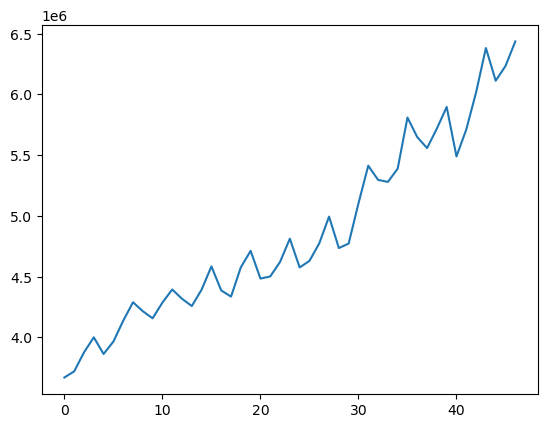

In [17]:
#畫圖
import matplotlib.pyplot as plt
GDP_index.plot()

In [19]:
#基本統計量
GDP_index.describe()

count    4.700000e+01
mean     4.862541e+06
std      7.531572e+05
min      3.670889e+06
25%      4.304030e+06
50%      4.629762e+06
75%      5.450948e+06
max      6.434655e+06
Name: GDP_index, dtype: float64

In [20]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
result1_GDP_index=adfuller(GDP_index)
result1_GDP_index

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示未拒絕HO，所以為非定態
print('ADF Statistic: %f' % result1_GDP_index[0])
print('p-value: %f' % result1_GDP_index[1])
for key , value in result1_GDP_index[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: 2.775908
p-value: 1.000000
	1%: -3.626652
	5%: -2.945951
	10%: -2.611671


<Axes: >

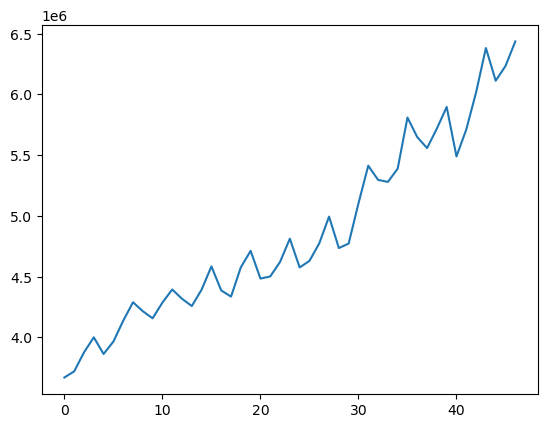

In [21]:
#看指數是否穩定
GDP_index.plot()

In [23]:
#計算成長率
#shift(1)表示前一期
GDP_index_ratio=(GDP_index-GDP_index.shift(1))/GDP_index.shift(1)
GDP_index_ratio

0          NaN
1     0.013720
2     0.041948
3     0.031950
4    -0.034254
5     0.026502
6     0.043083
7     0.036817
8    -0.017210
9    -0.013821
10    0.031012
11    0.025216
12   -0.017404
13   -0.013815
14    0.031766
15    0.043395
16   -0.043121
17   -0.011588
18    0.055612
19    0.029538
20   -0.048346
21    0.003861
22    0.026537
23    0.041342
24   -0.049115
25    0.011748
26    0.031191
27    0.046081
28   -0.051800
29    0.007794
30    0.069285
31    0.060720
32   -0.021527
33   -0.003173
34    0.020586
35    0.078110
36   -0.027795
37   -0.015867
38    0.028875
39    0.031066
40   -0.069058
41    0.040430
42    0.053436
43    0.060602
44   -0.042145
45    0.019861
46    0.032326
Name: GDP_index, dtype: float64

In [24]:
GDP_index_ratio=GDP_index_ratio.dropna()
GDP_index_ratio

1     0.013720
2     0.041948
3     0.031950
4    -0.034254
5     0.026502
6     0.043083
7     0.036817
8    -0.017210
9    -0.013821
10    0.031012
11    0.025216
12   -0.017404
13   -0.013815
14    0.031766
15    0.043395
16   -0.043121
17   -0.011588
18    0.055612
19    0.029538
20   -0.048346
21    0.003861
22    0.026537
23    0.041342
24   -0.049115
25    0.011748
26    0.031191
27    0.046081
28   -0.051800
29    0.007794
30    0.069285
31    0.060720
32   -0.021527
33   -0.003173
34    0.020586
35    0.078110
36   -0.027795
37   -0.015867
38    0.028875
39    0.031066
40   -0.069058
41    0.040430
42    0.053436
43    0.060602
44   -0.042145
45    0.019861
46    0.032326
Name: GDP_index, dtype: float64

<Axes: >

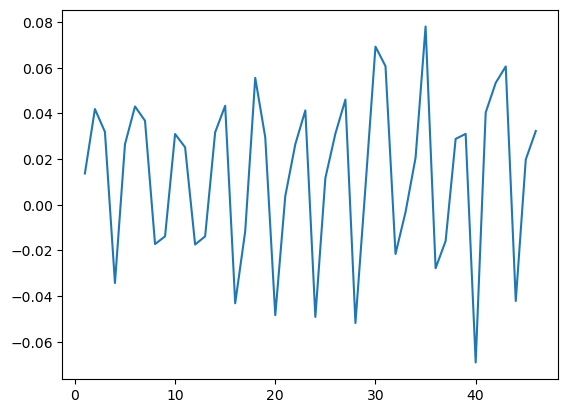

In [25]:
#看成長率是否穩定
GDP_index_ratio.plot()

In [26]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
result2_GDP_index=adfuller(GDP_index_ratio)
result2_GDP_index

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示不拒絕HO，所以為非定態
print('ADF Statistic: %f' % result2_GDP_index[0])
print('p-value: %f' % result2_GDP_index[1])
for key , value in result2_GDP_index[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -2.572649
p-value: 0.098783
	1%: -3.596636
	5%: -2.933297
	10%: -2.604991


In [27]:
#再差分
#shift(1)表示前一期
GDP_index_ratio2=(GDP_index_ratio-GDP_index_ratio.shift(1))/GDP_index_ratio.shift(1)
GDP_index_ratio2

1          NaN
2     2.057468
3    -0.238338
4    -2.072098
5    -1.773695
6     0.625663
7    -0.145446
8    -1.467445
9    -0.196915
10   -3.243818
11   -0.186898
12   -1.690213
13   -0.206222
14   -3.299362
15    0.366081
16   -1.993681
17   -0.731254
18   -5.798929
19   -0.468866
20   -2.636775
21   -1.079853
22    5.873769
23    0.557905
24   -2.188017
25   -1.239199
26    1.654933
27    0.477381
28   -2.124120
29   -1.150466
30    7.889289
31   -0.123611
32   -1.354521
33   -0.852622
34   -7.488896
35    2.794239
36   -1.355847
37   -0.429152
38   -2.819870
39    0.075874
40   -3.222914
41   -1.585452
42    0.321680
43    0.134105
44   -1.695437
45   -1.471256
46    0.627640
Name: GDP_index, dtype: float64

In [28]:
GDP_index_ratio2=GDP_index_ratio2.dropna()
GDP_index_ratio2

2     2.057468
3    -0.238338
4    -2.072098
5    -1.773695
6     0.625663
7    -0.145446
8    -1.467445
9    -0.196915
10   -3.243818
11   -0.186898
12   -1.690213
13   -0.206222
14   -3.299362
15    0.366081
16   -1.993681
17   -0.731254
18   -5.798929
19   -0.468866
20   -2.636775
21   -1.079853
22    5.873769
23    0.557905
24   -2.188017
25   -1.239199
26    1.654933
27    0.477381
28   -2.124120
29   -1.150466
30    7.889289
31   -0.123611
32   -1.354521
33   -0.852622
34   -7.488896
35    2.794239
36   -1.355847
37   -0.429152
38   -2.819870
39    0.075874
40   -3.222914
41   -1.585452
42    0.321680
43    0.134105
44   -1.695437
45   -1.471256
46    0.627640
Name: GDP_index, dtype: float64

<Axes: >

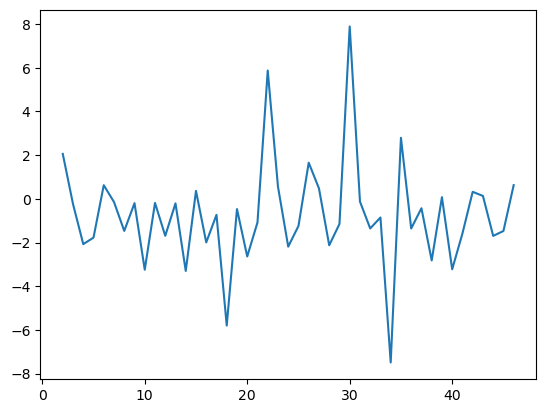

In [29]:
#看結果是否穩定
GDP_index_ratio2.plot()

In [30]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
result3_GDP_index=adfuller(GDP_index_ratio2)
result3_GDP_index

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示不拒絕HO，所以為非定態
print('ADF Statistic: %f' % result3_GDP_index[0])
print('p-value: %f' % result3_GDP_index[1])
for key , value in result3_GDP_index[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -7.386814
p-value: 0.000000
	1%: -3.588573
	5%: -2.929886
	10%: -2.603185


In [31]:
#計算自相關係數ACF
from statsmodels.tsa import stattools

In [32]:
#用星星表示下載全部模組的套件
from statsmodels.graphics.tsaplots import *

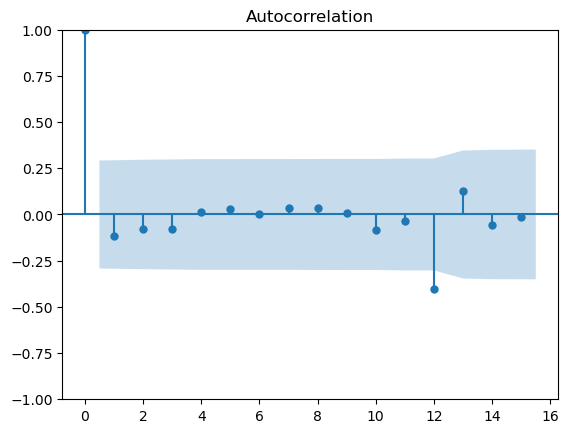

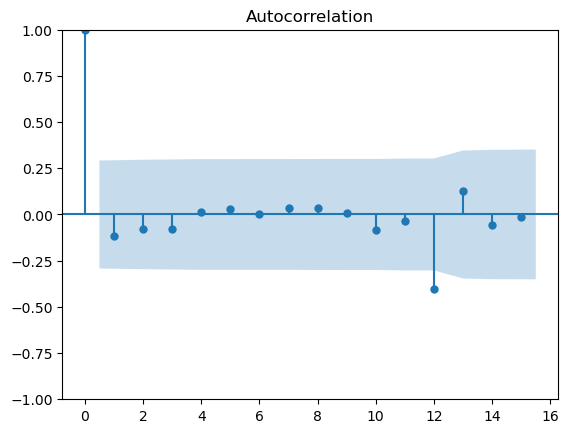

In [33]:
#結果表示穩定較不容易受間接效果影響
plot_acf(GDP_index_ratio2,lags=15)

In [34]:
acf_GDP_index=stattools.acf(GDP_index_ratio2)
acf_GDP_index

array([ 1.        , -0.11747116, -0.07610889, -0.07983792,  0.0127997 ,
        0.02716972,  0.00103531,  0.03441148,  0.03396326,  0.00970636,
       -0.08575694, -0.03501511, -0.40595963,  0.12529714, -0.05496002,
       -0.01540286,  0.07084415])

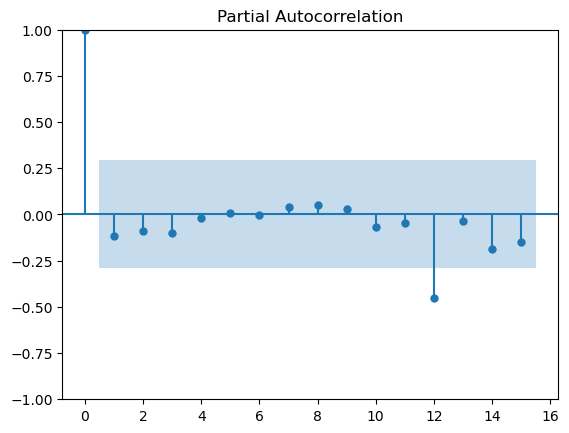

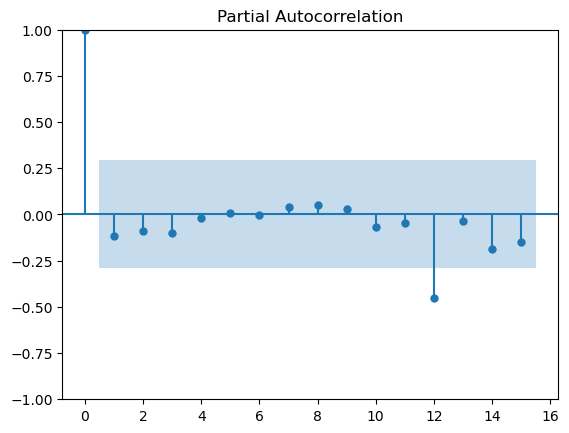

In [35]:
plot_pacf(GDP_index_ratio2,lags=15)

In [36]:
pacf_GDP_index=stattools.pacf(GDP_index_ratio2)
pacf_GDP_index

array([ 1.        , -0.12014096, -0.09546055, -0.11006918, -0.02082322,
        0.01191453, -0.00257768,  0.04650308,  0.06054098,  0.03710134,
       -0.08910877, -0.06458183, -0.62189461, -0.09268406, -0.37918517,
       -0.37542549, -0.07258934])

In [37]:
#ARMA模型(p,幾階差分,q)
from statsmodels.tsa.arima.model import ARIMA

In [38]:
#先嘗試MA模型 MA(1)
#先設定模型參數然後再跑
#BIC和BIC值愈小愈好
model1=ARIMA(GDP_index_ratio2,order=(0,0,1)).fit()
model1.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -103.633
Date:                Sat, 11 Jan 2025   AIC                            213.267
Time:                        20:04:12   BIC                            218.687
Sample:                             0   HQIC                           215.287
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7442      0.326     -2.285      0.022      -1.383      -0.106
ma.L1         -0.1505      0.199     -0.758      0.448      -0.540       0.239
sigma2         5.8564      0.785      7.461      0.000       4.318       7.395
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.53
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.72
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#再嘗試AR模型 AR(1)
#先設定模型參數然後再跑
model2=ARIMA(GDP_index_ratio2,order=(1,0,0)).fit()
model2.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -103.711
Date:                Sat, 11 Jan 2025   AIC                            213.423
Time:                        20:04:35   BIC                            218.843
Sample:                             0   HQIC                           215.443
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7404      0.342     -2.167      0.030      -1.410      -0.071
ar.L1         -0.1193      0.208     -0.572      0.567      -0.528       0.289
sigma2         5.8779      0.783      7.511      0.000       4.344       7.412
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                29.31
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.75
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#再嘗試ARMA模型 ARMA(1,1)
#先設定模型參數然後再跑
model3=ARIMA(GDP_index_ratio2,order=(1,0,1)).fit()
model3.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -102.374
Date:                Sat, 11 Jan 2025   AIC                            212.747
Time:                        20:04:51   BIC                            219.974
Sample:                             0   HQIC                           215.441
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7215      0.118     -6.119      0.000      -0.953      -0.490
ar.L1          0.8047      0.233      3.457      0.001       0.348       1.261
ma.L1         -0.9999    177.780     -0.006      0.996    -349.442     347.442
sigma2         5.3266    946.609      0.006      0.996   -1849.993    1860.646
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                22.88
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.73
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
#再嘗試MA模型 MA(2)
#先設定模型參數然後再跑
model4=ARIMA(GDP_index_ratio2,order=(0,0,2)).fit()
model4.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -103.418
Date:                Sat, 11 Jan 2025   AIC                            214.836
Time:                        20:05:00   BIC                            222.063
Sample:                             0   HQIC                           217.530
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7507      0.300     -2.503      0.012      -1.338      -0.163
ma.L1         -0.1491      0.208     -0.718      0.473      -0.556       0.258
ma.L2         -0.0945      0.221     -0.427      0.669      -0.528       0.339
sigma2         5.7978      0.832      6.971      0.000       4.168       7.428
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.89
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                             0.64
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
#再嘗試AR模型 AR(2)
#先設定模型參數然後再跑
model5=ARIMA(GDP_index_ratio2,order=(2,0,0)).fit()
model5.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -103.520
Date:                Sat, 11 Jan 2025   AIC                            215.041
Time:                        20:05:14   BIC                            222.268
Sample:                             0   HQIC                           217.735
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7471      0.454     -1.646      0.100      -1.637       0.143
ar.L1         -0.1310      0.205     -0.638      0.523      -0.533       0.271
ar.L2         -0.0918      0.370     -0.248      0.804      -0.818       0.634
sigma2         5.8260      0.802      7.262      0.000       4.254       7.398
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             0.63
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
#再嘗試ARMA模型 ARMA(2,2)
#先設定模型參數然後再跑
model6=ARIMA(GDP_index_ratio2,order=(2,0,2)).fit()
model6.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              GDP_index   No. Observations:                   45
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -102.351
Date:                Sat, 11 Jan 2025   AIC                            216.702
Time:                        20:07:20   BIC                            227.542
Sample:                             0   HQIC                           220.743
                                 - 45                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7220      0.145     -4.984      0.000      -1.006      -0.438
ar.L1         -0.1097      1.593     -0.069      0.945      -3.233       3.013
ar.L2          0.7312      1.147      0.637      0.524      -1.517       2.979
ma.L1         -0.0751    129.586     -0.001      1.000    -254.059     253.909
ma.L2         -0.9248    119.148     -0.008      0.994    -234.451     232.602
sigma2         5.3196    686.915      0.008      0.994   -1341.010    1351.649
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                21.57
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                             0.68
Prob(H) (two-sided):                  0.19   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#最後選擇MARMA(1,1)
#檢查ARMA(1,1)殘差，做殘差檢定
#計算標準化殘差
import math
import numpy as np
stdresid=model3.resid/math.sqrt(np.var(model6.resid))
stdresid

2     1.185009
3     0.321782
4    -0.448549
5    -0.397156
6     0.568327
7     0.311817
8    -0.224382
9     0.269077
10   -1.002086
11    0.146275
12   -0.457834
13    0.116896
14   -1.164653
15    0.235994
16   -0.689808
17   -0.228998
18   -2.381681
19   -0.441026
20   -1.328222
21   -0.776828
22    2.185038
23    0.395388
24   -0.681602
25   -0.378026
26    0.824333
27    0.496086
28   -0.527449
29   -0.214547
30    3.610192
31    0.816219
32    0.320342
33    0.473670
34   -2.378560
35    1.498939
36   -0.012534
37    0.330068
38   -0.672317
39    0.402226
40   -0.946527
41   -0.437028
42    0.313116
43    0.313797
44   -0.401202
45   -0.379054
46    0.460618
dtype: float64

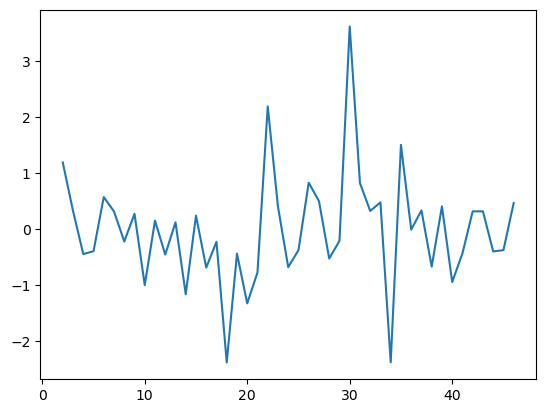

In [46]:
#結果看起來為隨機，不過需要作檢定
plt.plot(stdresid)

In [47]:
#檢測隨機漫步 LB test
#結果表示拒絕H0，為隨機漫步
#只顯示最後一個 p-value
#檢測殘差
#p值很小所以具有隨機性
LungBox_ret=stattools.q_stat(stattools.acf(stdresid),len(stdresid))
LungBox_ret[1][-1]

4.1159207875264993e-07

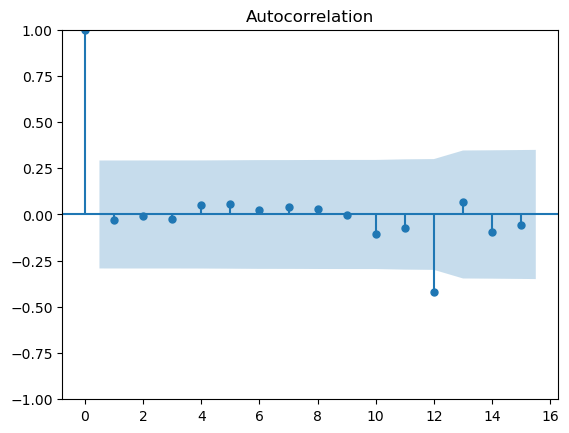

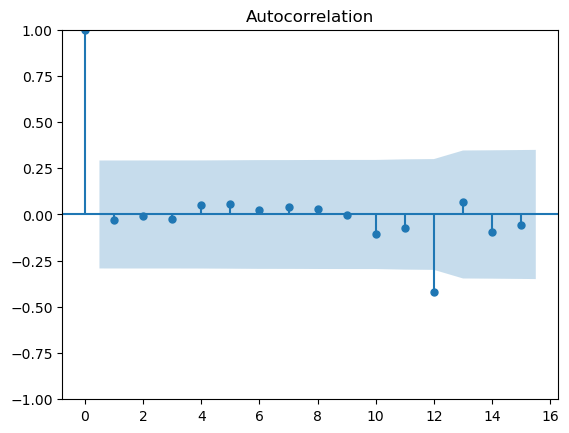

In [48]:
#圖形表示穩定
plot_acf(stdresid,lags=15)

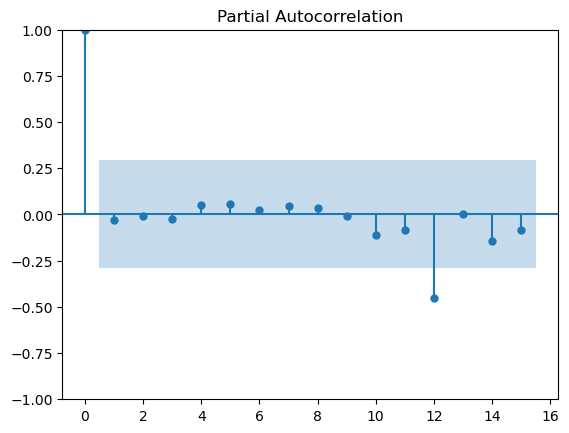

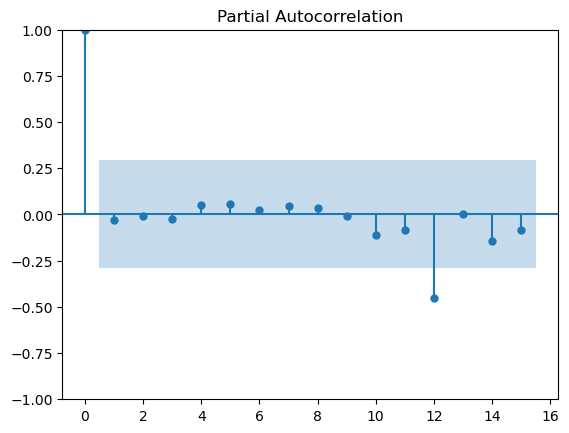

In [49]:
#用pacf相對acf更穩定
plot_pacf(stdresid,lags=15)

In [51]:
model3.forecast(5)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


45   -0.696206
46   -0.701151
47   -0.705130
48   -0.708332
49   -0.710908
Name: predicted_mean, dtype: float64